### Задание 1 - по тетрадке sem01_autograd.

1. Добавить Bias и посчитать для них градиенты.
2. Сравнить градиенты с тем, как считает PyTorch AutoGrad.

In [ ]:
import numpy as np
import torch

In [ ]:
print (torch.__version__)

2.5.1+cu124


In [ ]:
batch_size = 64
input_size = 3
hidden_size = 2
output_size = 1

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create random input and output data
x = torch.randn(batch_size, input_size, device=device, dtype=torch.float32)
y = torch.randn(batch_size, output_size, device=device, dtype=torch.float32)

# Randomly initialize weights
w1 = torch.randn(input_size, hidden_size, device=device, dtype=torch.float32)
w2 = torch.randn(hidden_size, output_size, device=device, dtype=torch.float32)

In [ ]:
#добавляем bias

b1 = torch.randn(hidden_size, device=device, dtype=torch.float32)
b2 = torch.randn(output_size, device=device, dtype=torch.float32)

In [ ]:
learning_rate = 1e-6

for t in range (500):
    h_1 = x @ (w1) + b1
    h_relu = h_1.clamp(min=0)
    out = h_relu @ (w2) + b2  #predicted y

    loss = (out - y).pow (2).sum ().item ()
    dloss_out = 2 * (out - y)

    #градиенты 2 слоя
    grad_w2 = h_relu.T @ (dloss_out)
    grad_b2 = dloss_out.sum (dim=0)

    #градиенты 1 слоя
    grad_hrelu = dloss_out @ (w2.T)
    grad_hrelu [h_1 < 0] = 0
    grad_w1 = x.T @ (grad_hrelu)
    grad_b1 = grad_hrelu.sum (dim=0)

    #обновление весов
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

    #и bias
    b1 -= learning_rate * grad_b1
    b2 -= learning_rate * grad_b2

    if t % 100 == 99:
        print (f'Loss on iteration {t} = {loss}')

Loss on iteration 99 = 71.87409973144531
Loss on iteration 199 = 71.84296417236328
Loss on iteration 299 = 71.8123550415039
Loss on iteration 399 = 71.7822494506836
Loss on iteration 499 = 71.75259399414062


In [ ]:
print (w2.shape)
print (dloss_out.shape)
print (h_1.shape)
print (grad_hrelu.shape)

torch.Size([2, 1])
torch.Size([64, 1])
torch.Size([64, 2])
torch.Size([64, 2])


In [ ]:
x1 = x
y1 = y

w1 = w1.requires_grad_()
w2 = w2.requires_grad_()
b1 = b1.requires_grad_()
b2 = b2.requires_grad_()


In [ ]:
learning_rate = 1e-6

for t in range (500):

    out = (x @ (w1) + b1).clamp (min=0) @ (w2) + b2  #predicted y

    loss = (out - y).pow (2).sum ()

    loss.backward () #вычисление градиентов

    with torch.no_grad():

      #обновление весов
      w1 -= learning_rate * w1.grad
      w2 -= learning_rate * w2.grad
      b1 -= learning_rate * b1
      b2 -= learning_rate * b2

    #обнулить градиенты
    w1.grad.zero_()
    w2.grad.zero_()
    b1.grad.zero_()
    b2.grad.zero_()


    if t % 100 == 99:
        print (f'Loss on iteration {t} = {loss}')

Loss on iteration 99 = 71.74266815185547
Loss on iteration 199 = 71.73302459716797
Loss on iteration 299 = 71.72346496582031
Loss on iteration 399 = 71.71399688720703
Loss on iteration 499 = 71.70462036132812


### Задание 2.

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка, и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/data_stud/hw01.csv',index_col=0)

Как и в любой задаче машинного обучения, для начала надо визуализировать данные.
Не зря же нашу нейронную сеть мы так долго учим?


<Axes: xlabel='x1', ylabel='x2'>

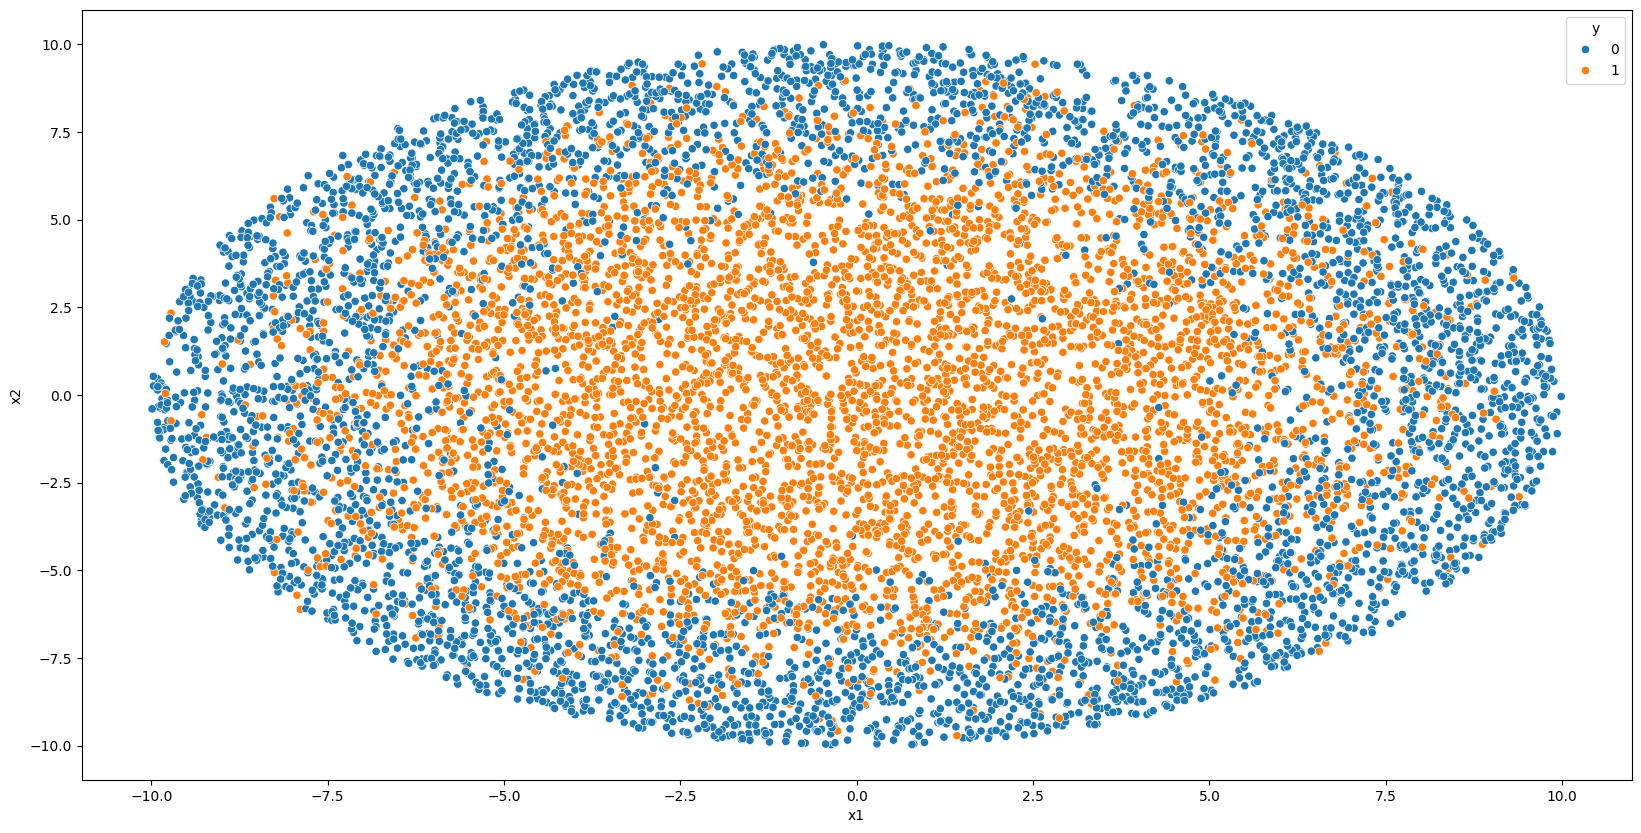

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data=df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# разобьем выборку на трейн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size=0.33)

Точность нашей модели 0.5806060606060606


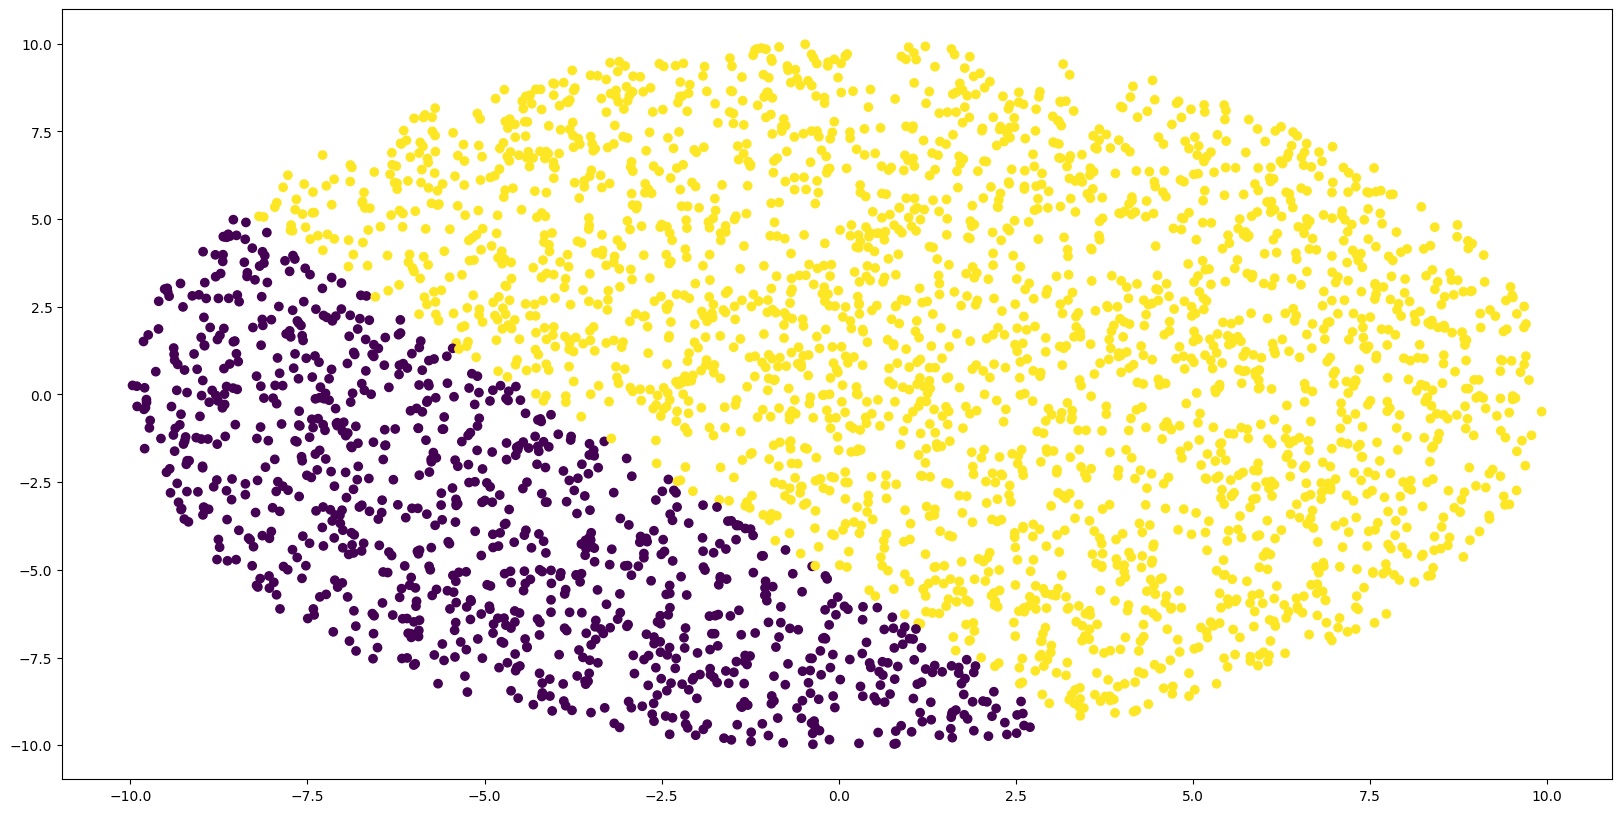

In [ ]:
from sklearn.linear_model import LogisticRegression


#########################################
# Ваш код для Логистической регрессии

model = LogisticRegression ()
model.fit (X_train, y_train)
predict_logit = model.predict (X_test)
predict_log_proba = model.predict (X_test)

#########################################


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=predict_log_proba)
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

<Axes: xlabel='x1', ylabel='x2'>

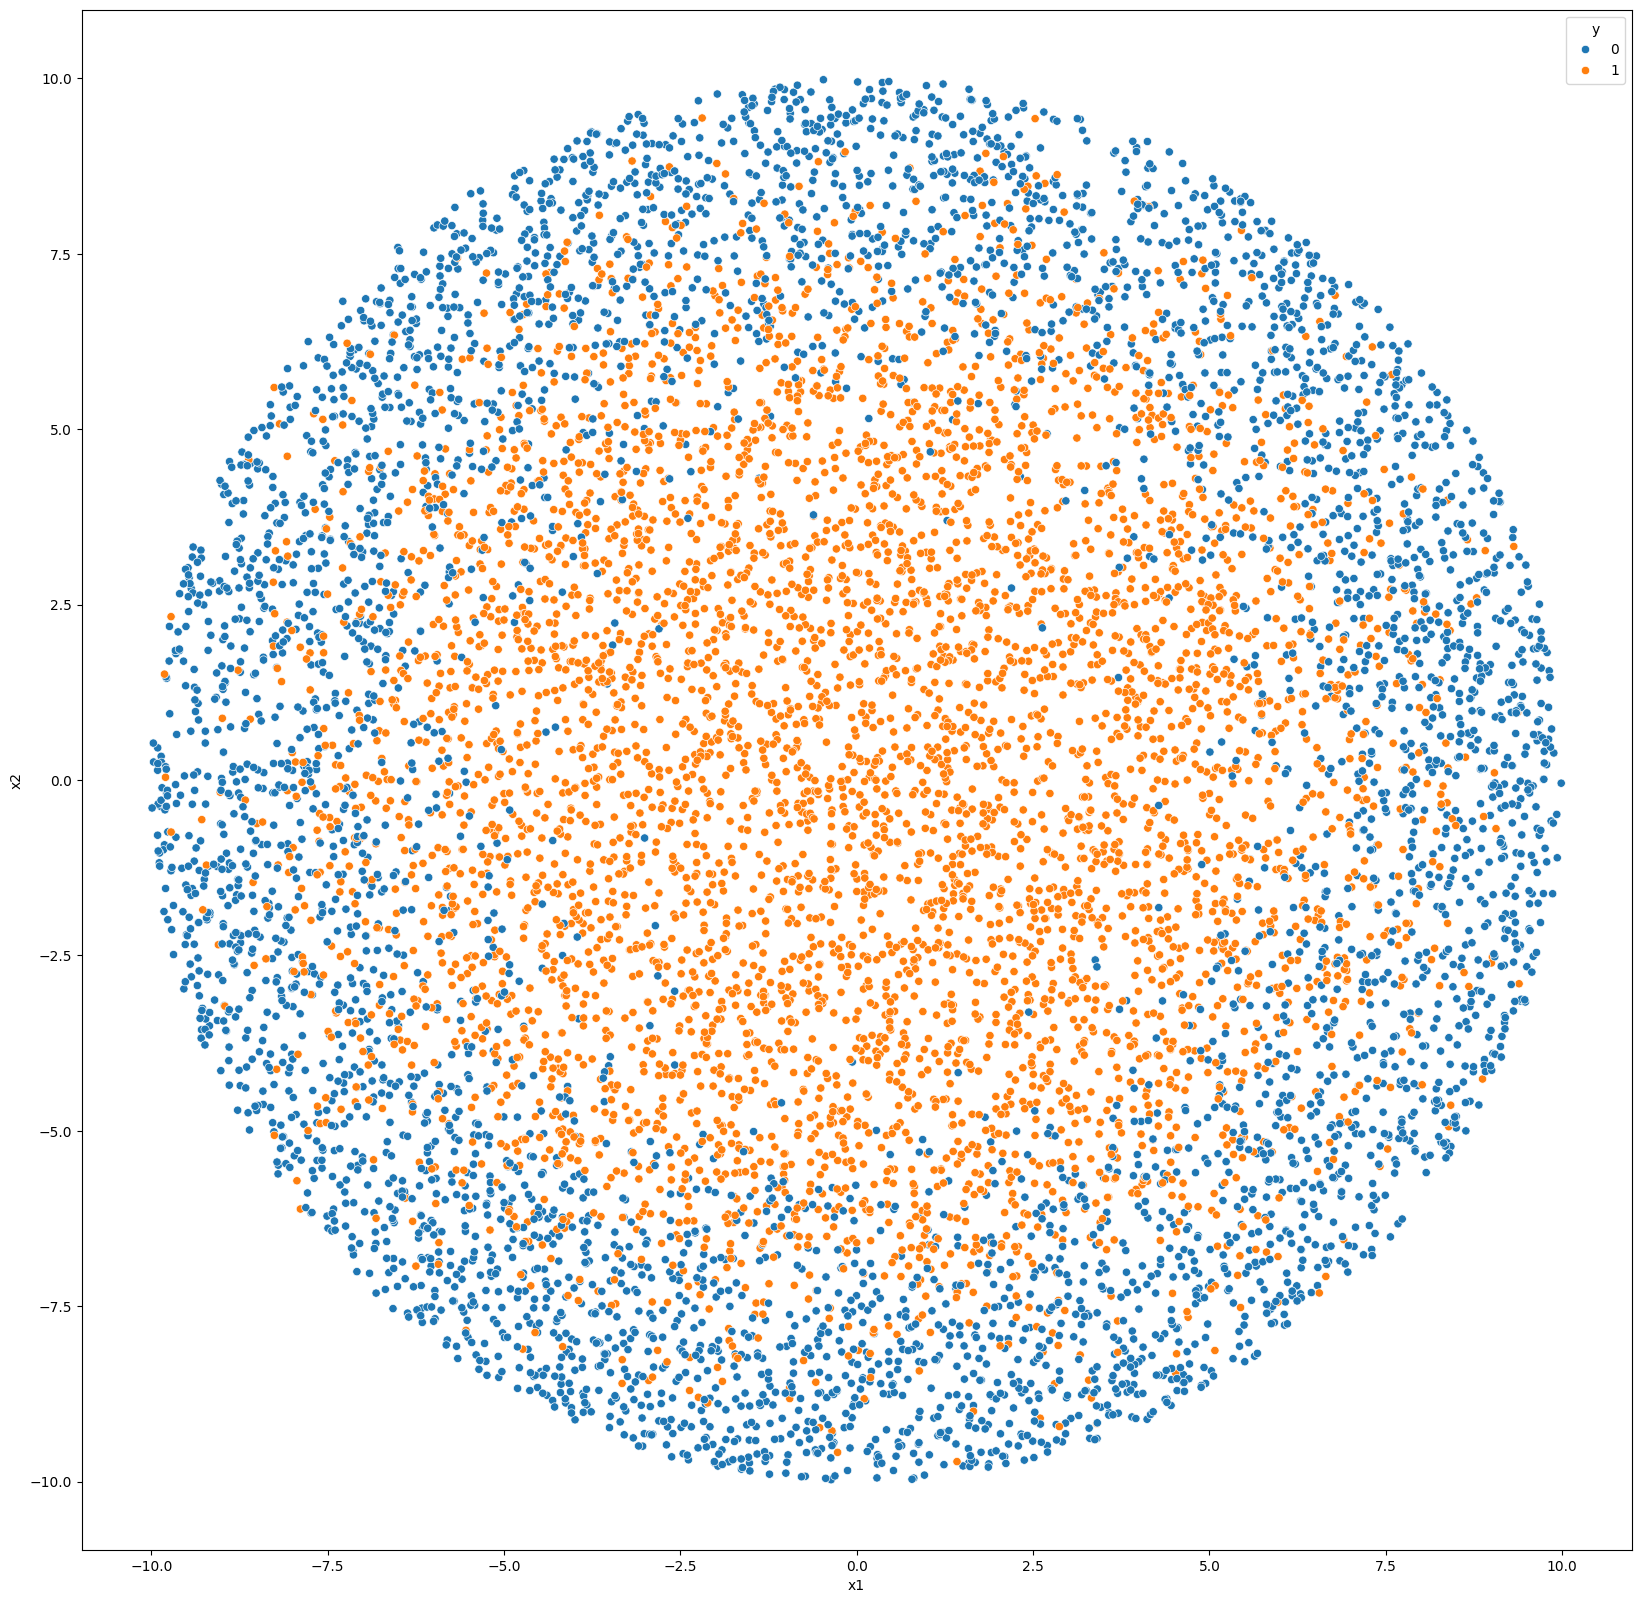

In [ ]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x="x1", y="x2", hue="y", data=df) #это чтобы проверить что данные реально расположены в круге

Точность нашей модели 0.7809090909090909


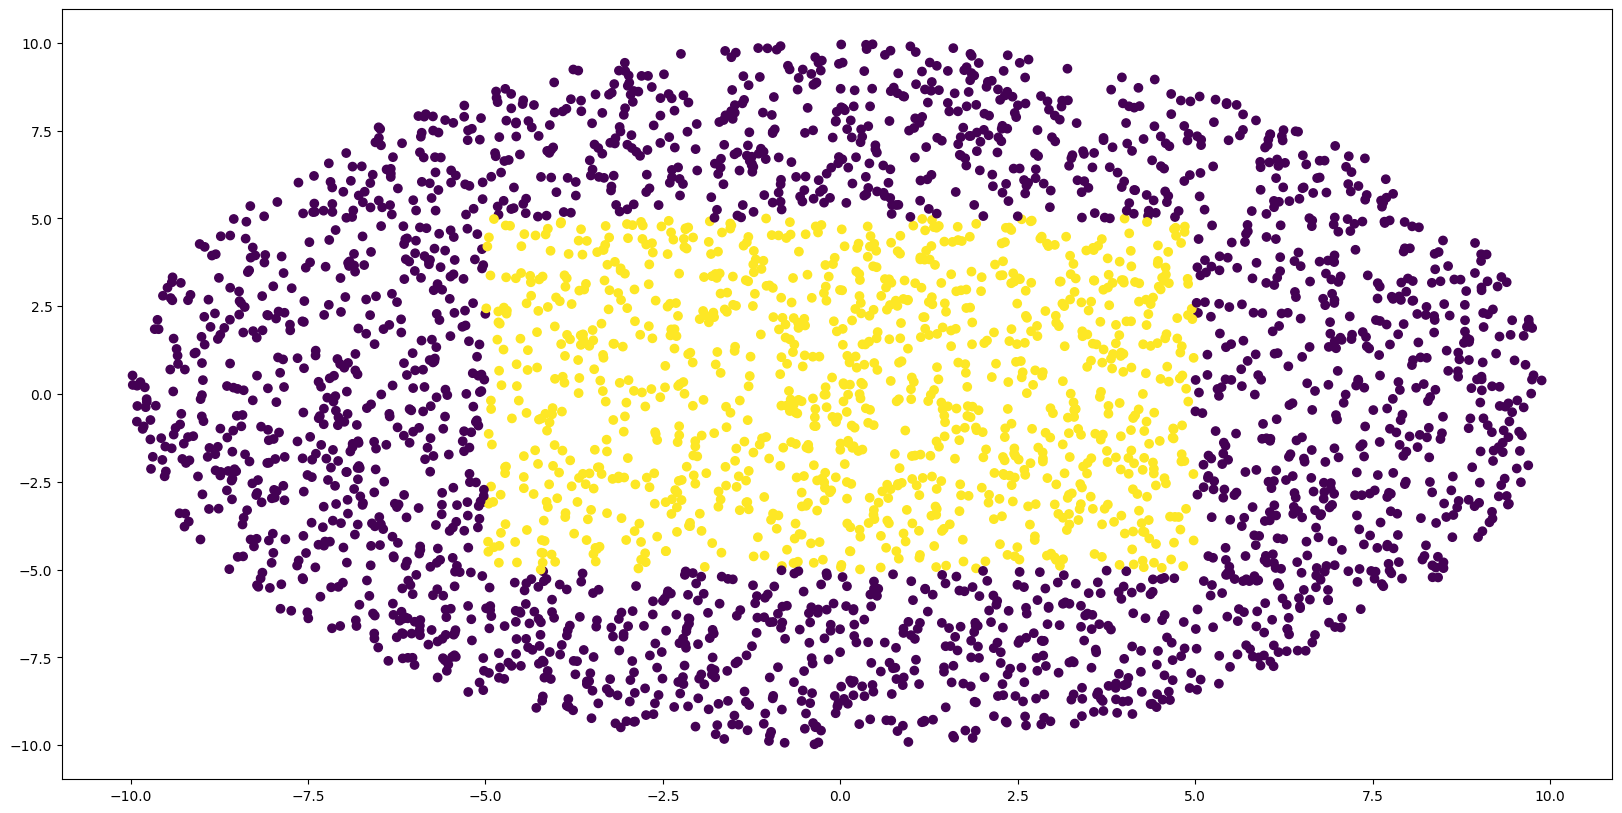

In [ ]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

df_new['new_feature_1'] = ((df_new['x1'].between (-5, 5)) & (df_new['x2'].between (-5, 5))).astype(int) #это если ограничиться квадратом

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'new_feature_1']],
                                                                    df_new['y'], test_size=0.33)

model = LogisticRegression ()
model.fit (X_train_new, y_train_new)
predict_logit = model.predict (X_test_new)
predict_log_proba = model.predict (X_test_new)

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c=predict_log_proba)
plt.show()

Точность нашей модели 0.8406060606060606


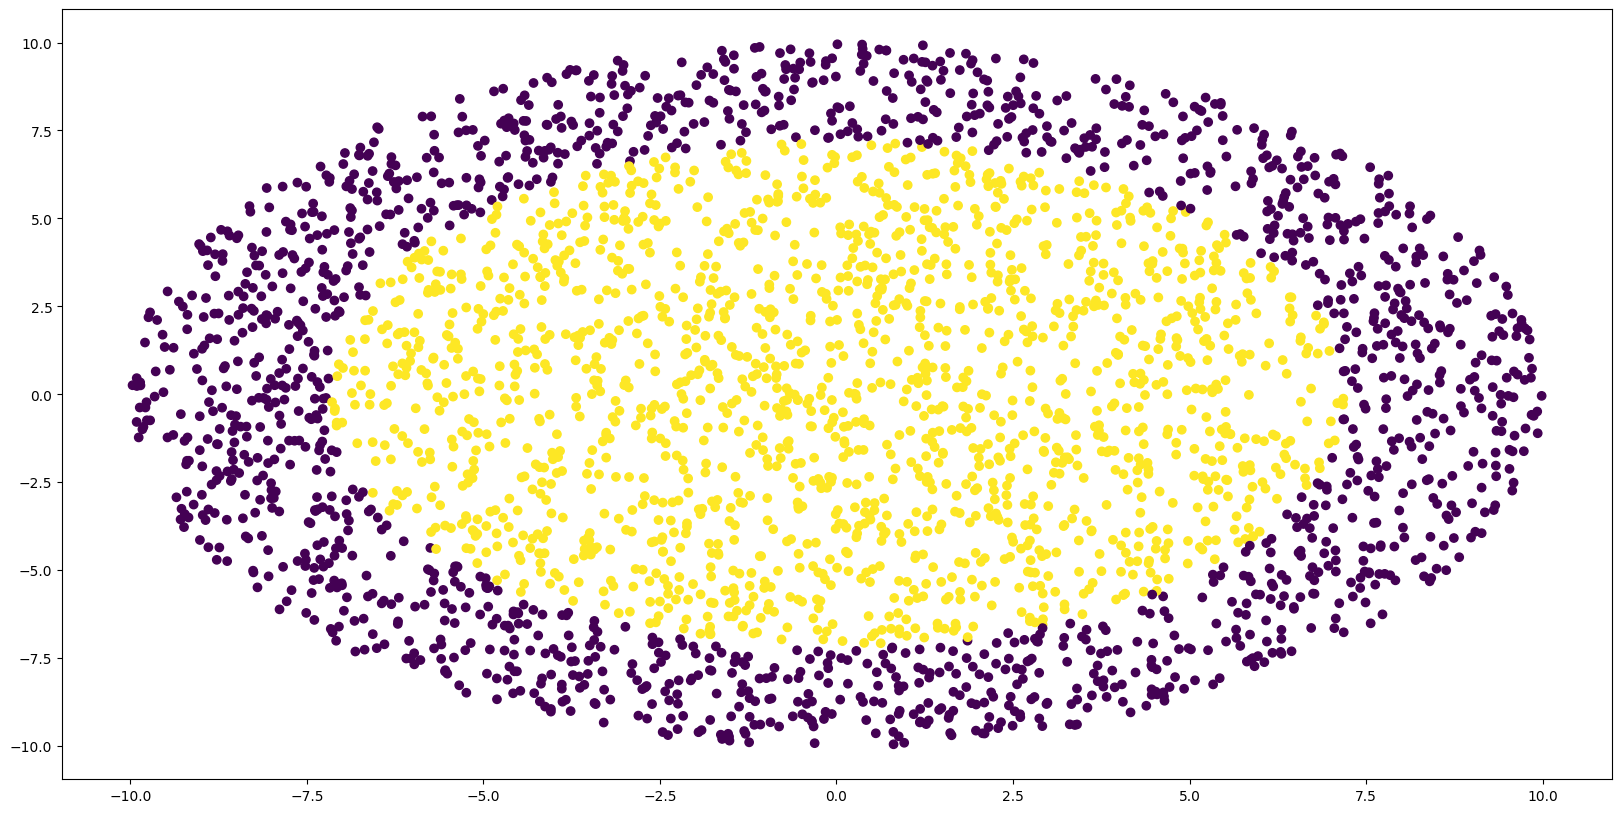

In [ ]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

df_new['new_feature_1'] = ((df_new['x1']**2 + df_new['x2']**2) <= 7.2**2).astype(int) #1 если точка внутри окружности радиусом 7.2, вычисляется евклидовым расстоянием

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'new_feature_1']],
                                                                    df_new['y'], test_size=0.33)

model = LogisticRegression ()
model.fit (X_train_new, y_train_new)
predict_logit = model.predict (X_test_new)
predict_log_proba = model.predict (X_test_new)

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c=predict_log_proba)
plt.show()

Переходим к следующему классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение?

Точность нашей модели 0.8245454545454546


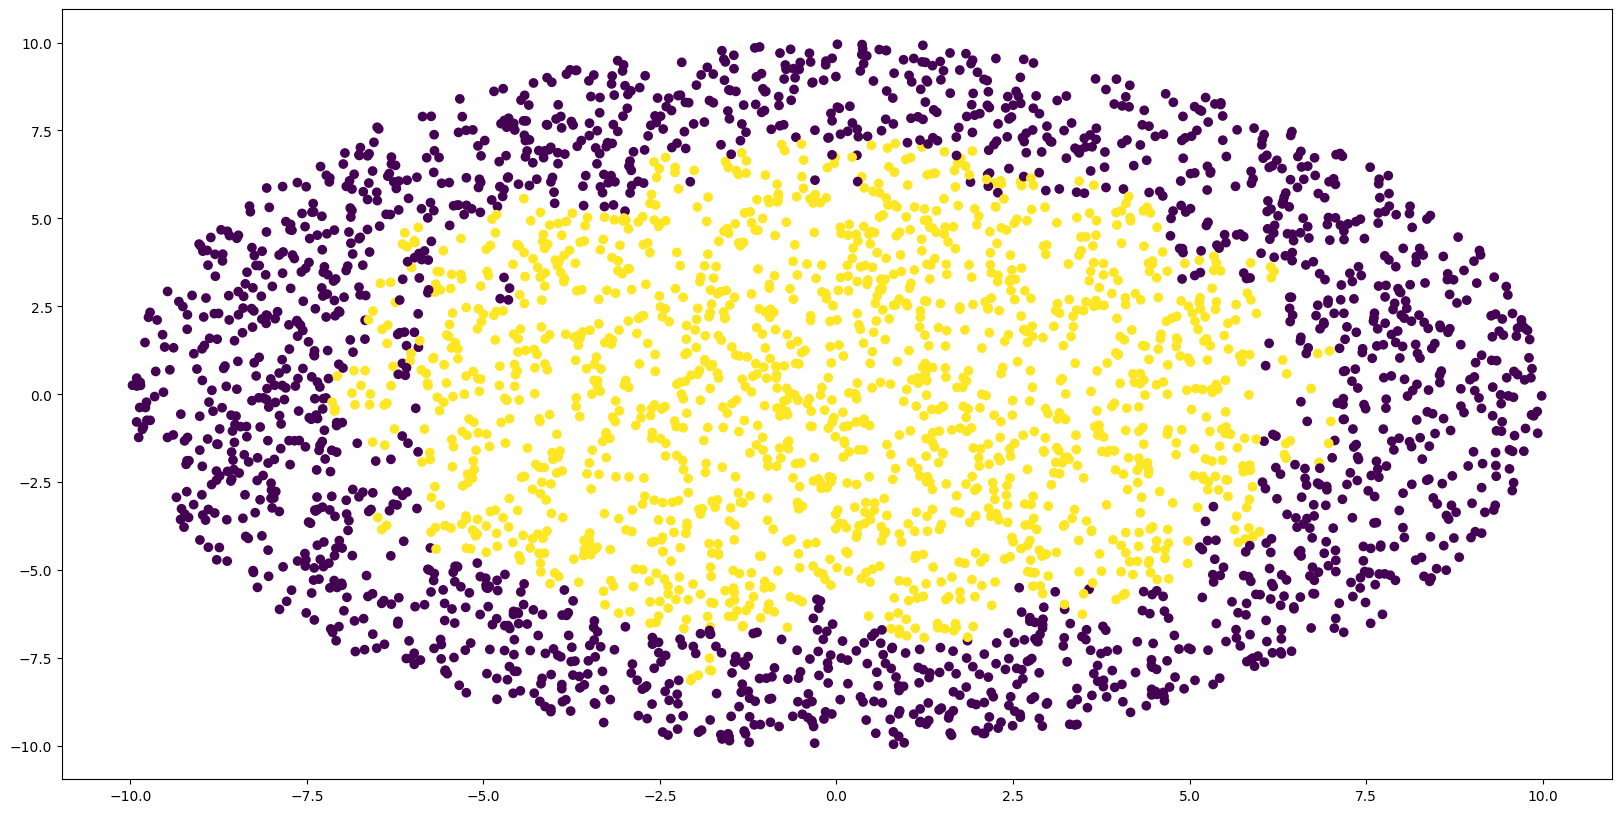

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#########################################
# Ваш код

model1 = DecisionTreeClassifier (max_depth=10, random_state=10, min_samples_leaf=10)
model1.fit (X_train_new, y_train_new)
predict_tree_proba = model1.predict (X_test_new)

#########################################

print(f'Точность нашей модели {accuracy_score(predict_tree_proba, y_test_new)}')

plt.figure(figsize=(20,10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c=predict_tree_proba)
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

Точность нашей модели 0.8124242424242424


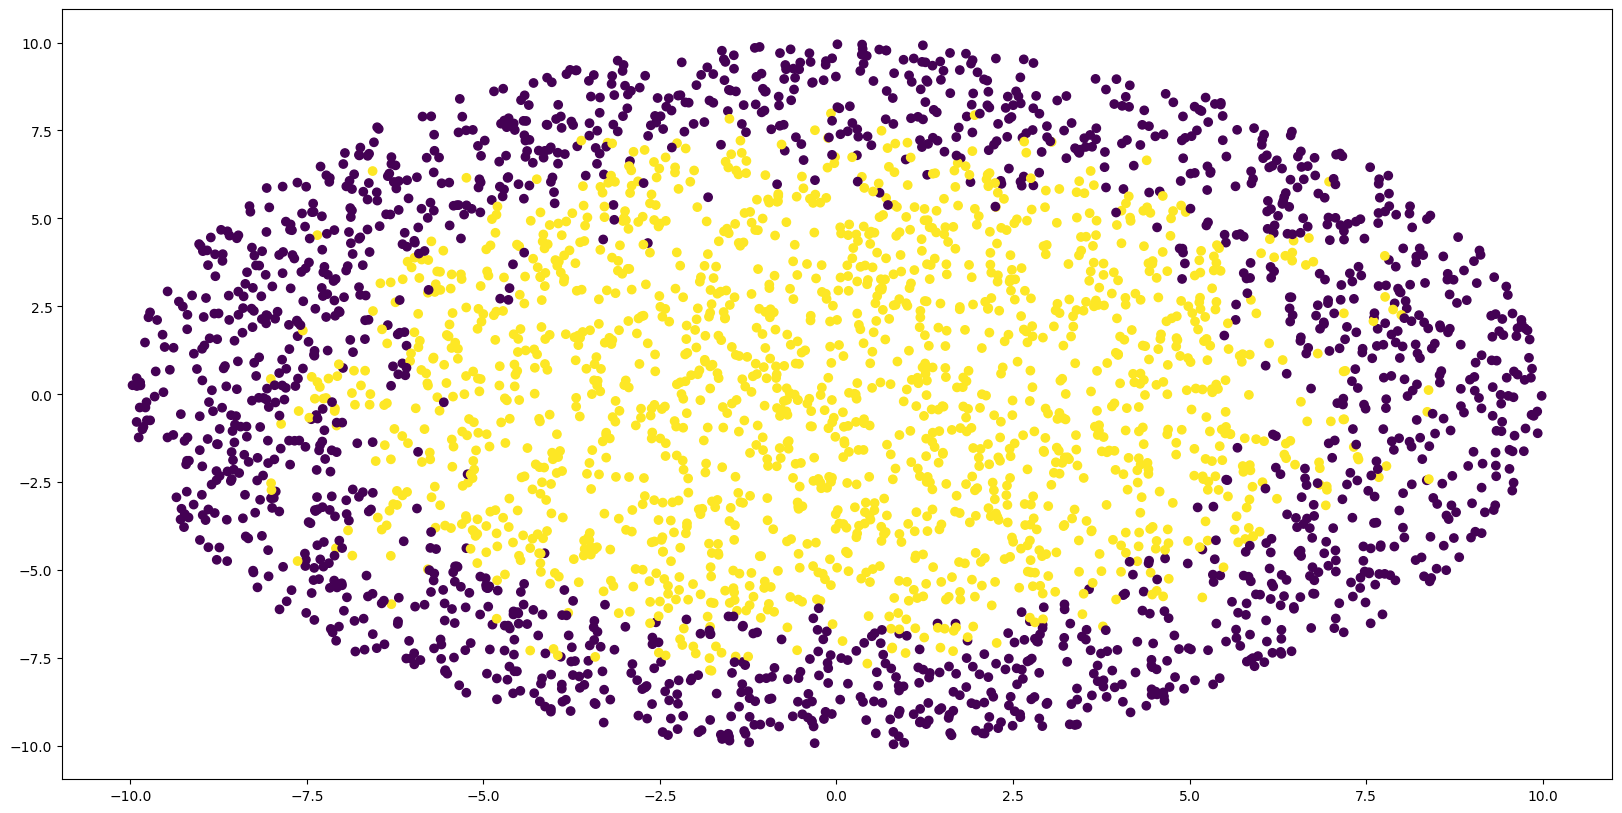

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#########################################
# Ваш код

model2 = RandomForestClassifier(n_estimators=100, random_state=42) #результат с 1 раза
model2.fit (X_train_new, y_train_new)
predict_forest_proba = model2.predict (X_test_new)

#########################################

print(f'Точность нашей модели {accuracy_score(predict_forest_proba, y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c=predict_forest_proba)
plt.show()

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом.

In [ ]:
pip install -U torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.6/931.6 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import torch
import torch.nn.functional as F
from torch import nn
import torch.optim as optim
import torch.utils.data as data_utils
from torchmetrics import Accuracy

In [ ]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

#df_new['new_feature_1'] = ((df_new['x1'].between (-5, 5)) & (df_new['x2'].between (-5, 5))).astype(int) #это если ограничиться квадратом

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2']],
                                                                    df_new['y'], test_size=0.33)

In [ ]:
def create_data_loader(X_train, y_train, X_test, y_test):
    train_tensor = data_utils.TensorDataset(torch.tensor(X_train.astype(np.float32)), torch.tensor(y_train))
    train_loader = data_utils.DataLoader(dataset=train_tensor,
                                         batch_size=64,
                                         shuffle=True)

    test_tensor = data_utils.TensorDataset(torch.tensor(X_test.astype(np.float32)), torch.tensor(y_test))
    test_loader = data_utils.DataLoader(dataset=test_tensor,
                                        batch_size=64,
                                        shuffle=False)
    return train_loader, test_loader

train_loader, test_loader = create_data_loader(X_train_new.to_numpy(), y_train_new.to_numpy(), X_test_new.to_numpy(), y_test_new.to_numpy())

In [ ]:
input_size = 2
hidden_size = 5
output_size = 1
learning_rate = 1e-6
epochs = 100

class LeModel (nn.Module):
    def __init__(self):
        super(LeModel, self).__init__()
        self.layer1 = nn.Linear (input_size, hidden_size)
        self.layer2 = nn.Linear (hidden_size, output_size)

    def forward(self, x):
        x = F.relu (self.layer1 (x))
        x = torch.sigmoid (self.layer2 (x))
        return x

In [ ]:
model = LeModel ()

In [ ]:
criterion = nn.BCELoss()
accuracy = Accuracy(task='binary')
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:

for epoch in range (epochs):

    model.train()
    epoch_loss = 0.0
    accuracy.reset()

    for inputs, labels in train_loader:

        inputs, labels = inputs, labels
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        predictions = (outputs > 0.5).float()
        accuracy.update(predictions, labels)
        epoch_loss += loss.item()


    epoch_accuracy = accuracy.compute()
    if epoch % 10 == 9:
      print(f"Epoch {epoch}: Loss = {epoch_loss:.4f}, Accuracy = {epoch_accuracy:.4f}")


Epoch 9: Loss = 108.8979, Accuracy = 0.5021
Epoch 19: Loss = 108.5153, Accuracy = 0.5025
Epoch 29: Loss = 108.0922, Accuracy = 0.5025
Epoch 39: Loss = 107.7047, Accuracy = 0.5024
Epoch 49: Loss = 107.3183, Accuracy = 0.5022
Epoch 59: Loss = 106.9089, Accuracy = 0.5019
Epoch 69: Loss = 106.5165, Accuracy = 0.5018
Epoch 79: Loss = 106.1919, Accuracy = 0.5018
Epoch 89: Loss = 105.6938, Accuracy = 0.5016
Epoch 99: Loss = 105.3268, Accuracy = 0.5018


In [ ]:
with torch.no_grad():
    test_scores = model(torch.tensor(X_test_new.to_numpy().astype(np.float32)))

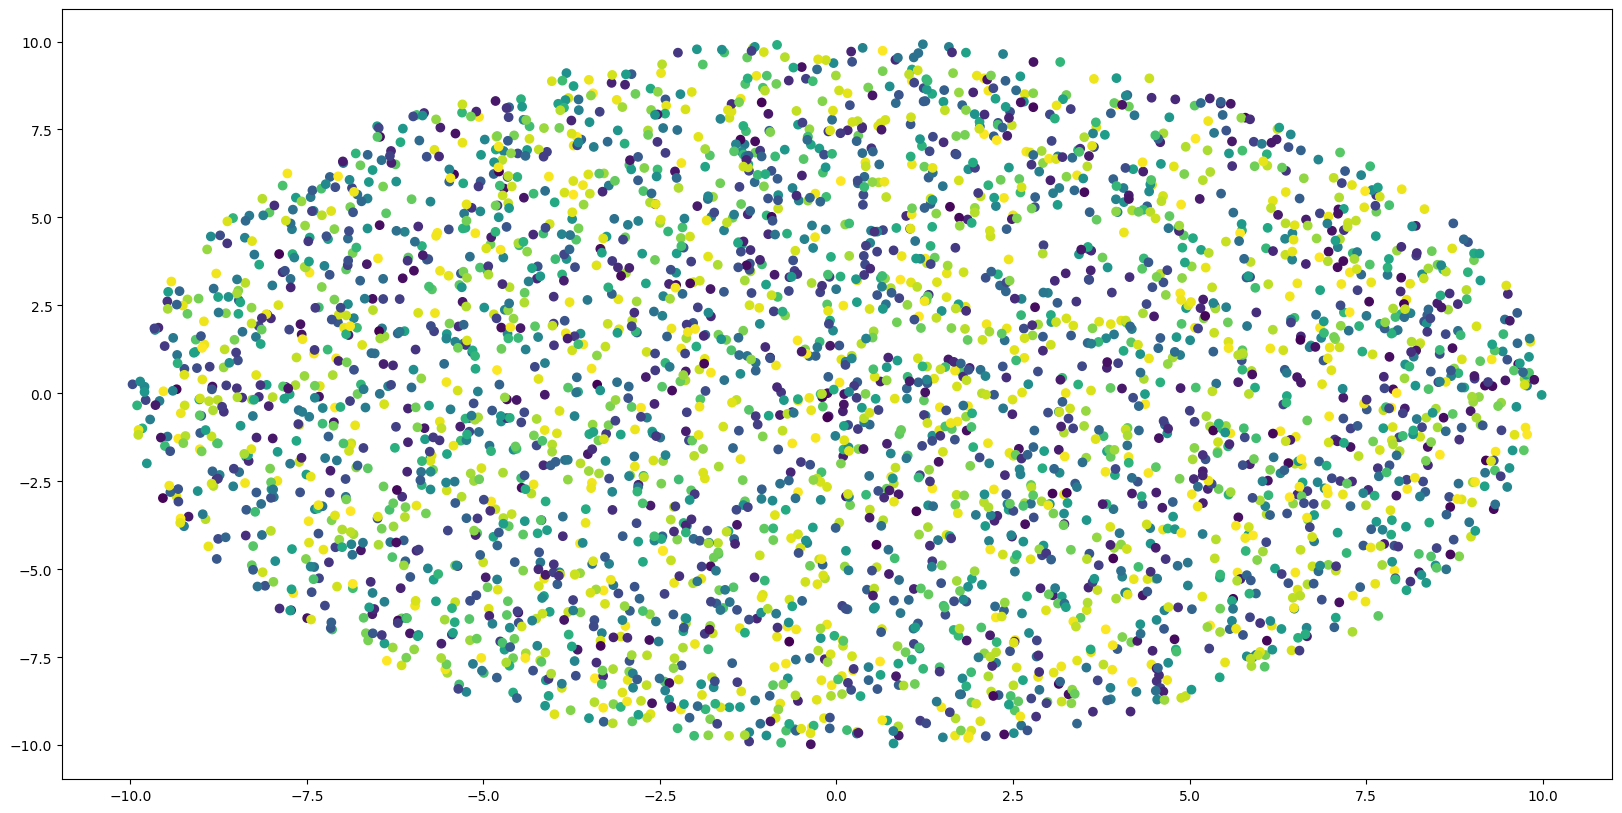

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=test_scores)
plt.show()

In [80]:
learning_rate = 0.01

In [81]:
criterion = nn.MSELoss()
accuracy = Accuracy(task='binary')
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [82]:
for epoch in range (epochs):

    model.train()
    epoch_loss = 0.0
    accuracy.reset()

    for inputs, labels in train_loader:

        inputs, labels = inputs, labels
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        predictions = (outputs > 0.5).float()
        accuracy.update(predictions, labels)
        epoch_loss += loss.item()


    epoch_accuracy = accuracy.compute()
    if epoch % 10 == 9:
      print(f"Epoch {epoch}: Loss = {epoch_loss:.4f}, Accuracy = {epoch_accuracy:.4f}")


Epoch 9: Loss = 12.6178, Accuracy = 0.8267
Epoch 19: Loss = 12.2430, Accuracy = 0.8355
Epoch 29: Loss = 12.2490, Accuracy = 0.8339
Epoch 39: Loss = 12.3257, Accuracy = 0.8361
Epoch 49: Loss = 12.2355, Accuracy = 0.8372
Epoch 59: Loss = 12.2569, Accuracy = 0.8322
Epoch 69: Loss = 12.2154, Accuracy = 0.8364
Epoch 79: Loss = 12.1743, Accuracy = 0.8373
Epoch 89: Loss = 12.2222, Accuracy = 0.8378
Epoch 99: Loss = 12.1741, Accuracy = 0.8360


In [83]:
with torch.no_grad():
    test_scores = model(torch.tensor(X_test_new.to_numpy().astype(np.float32)))

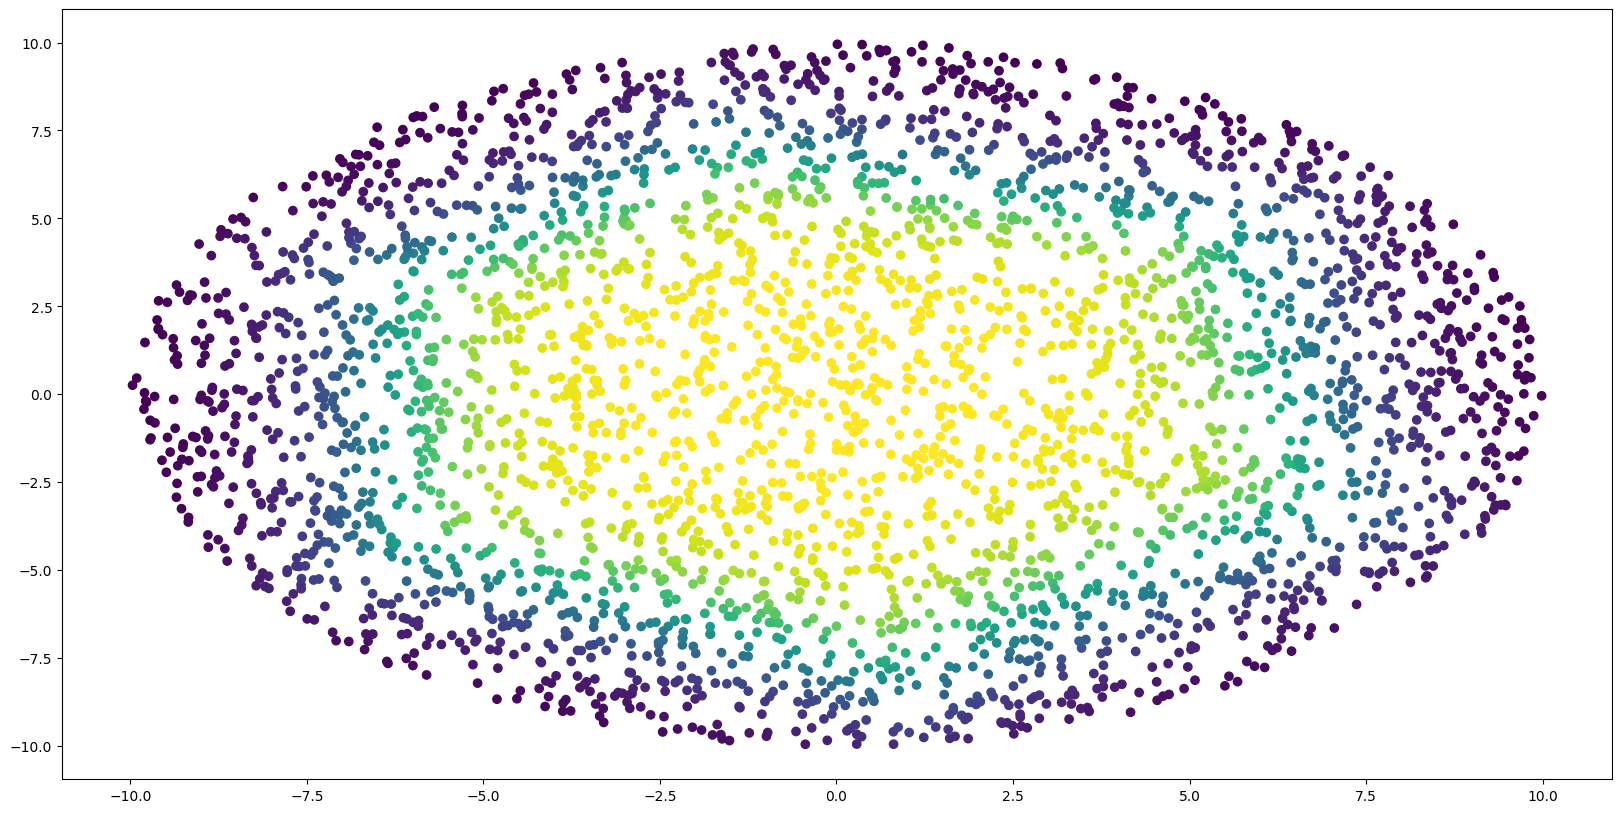

In [85]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c=test_scores)
plt.show()